<a href="https://colab.research.google.com/github/dyc-d/workflow/blob/master/tf2_0_rumen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import tensorflow as tf
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1 + 0.3

# 一维结构， 范围-1~1
Weights = tf.Variable(tf.random.uniform([1],-1.0,1.0))
biases = tf.Variable(tf.zeros([1]))

y = Weights*x_data + biases

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()  #tensrflow 执行这句后 变量才会更新

# 定义一个任务
sess = tf.Session()
sess.run(init)    # run（init） 才会更新所有变量

for step in range(2001):
  sess.run(train)
  if step%20 == 0:
    print(step, sess.run(Weights), sess.run(biases))
sess.close()


Instructions for updating:
Use `tf.global_variables_initializer` instead.


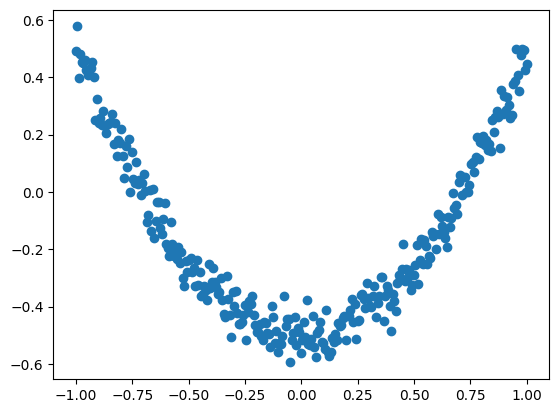

In [ ]:
# 激励函数 将函数进行非线性换
import matplotlib.pyplot as plt
def add_layer(inputs,in_size,out_size,activation_function=None):
  with tf.name_scope('layer'):
    with tf.name_scope('Weights'):
      Weights = tf.Variable(tf.random_normal([in_size,out_size]))  #正态分布
    with tf.name_scope('biases'):
      biases = tf.Variable(tf.zeros([1,out_size])+0.1)   # 1行out_size列
    Wx_plus_b = tf.matmul(inputs,Weights) + biases
    if activation_function is None:
      outputs = Wx_plus_b
    else:
      outputs = activation_function(Wx_plus_b)
    return outputs

x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

with tf.name_scope('inputs'):
  xs = tf.placeholder(tf.float32,[None,1],name='x_input')
  ys = tf.placeholder(tf.float32,[None,1],name='y_input')
l1 = add_layer(xs,1,10,activation_function=tf.nn.relu)
prediction = add_layer(l1,10,1,activation_function=None)

with tf.name_scope('loss'):
# 其中，reduction_indices=[1] 参数指定了沿着第一个维度（即行）进行求和。square表示平方
  loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),reduction_indices=[1]))
with tf.name_scope('train'):
  train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.initialize_all_variables()
sess = tf.Session()
writer = tf.summary.FileWriter("logs/",sess.graph)
sess.run(init)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion()
plt.show()
for i in range(10000):
  sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
  if i%500 == 0:
    #print(i,sess.run(loss, feed_dict={xs:x_data,ys:y_data}))
    try:
      ax.lines.remove(lines[0])
    except Exception:
      pass
    prediction_value = sess.run(prediction,feed_dict={xs:x_data})
    lines = ax.plot(x_data,prediction_value,'r',lw=5)
    plt.show()
    plt.pause(0.1)



In [ ]:
## 过拟合问题：加大数据集、正规化（惩罚变化过大的W）、Dropout（手动deactivate一些神经元）

In [ ]:
!pip install google_colab_shell
from google_colab_shell import getshell


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for google_colab_shell: filename=google_colab_shell-0.2-py3-none-any.whl size=4108 sha256=d105636892f9f2856bd5f5144a7458af3684047553102eabf95dbabab749372d
  Stored in directory: /root/.cache/pip/wheels/f9/36/65/95dd4599be065418a9fe1f482674c8e716ce540f3f484681d2
Successfully built google_colab_shell


In [ ]:
getshell()

In [12]:
import tensorflow as tf
boston_housing = tf.keras.datasets.boston_housing

(train_x, train_y), (test_x,test_y) = boston_housing.load_data()
test_x.shape

In [11]:
import matplotlib.pyplot as plt
import numpy as np

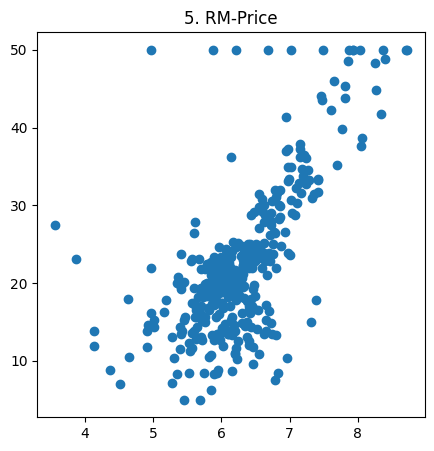

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(train_x[:,5],train_y)
plt.title("5. RM-Price")
plt.show()


In [18]:
############################################
# tensorflow2.0  学习之路
import tensorflow as tf
print(tf.__version__)
print(tf.executing_eagerly())

2.12.0
True


In [36]:
# list np pands 张量
#list 可以存放不同数据类型，内存不连续存放，动态数组、不适合数值计算
#np(ndarray) 数据类型相同 存放位置连续  但不能够主动检测利用GPU
#张量 支持CPU、GPU、TPU单机多卡等环境

a = tf.constant([[1,2],[3,4]],dtype=tf.float32)
print(a)

na=np.arange(12).reshape(3,4)
ta=tf.convert_to_tensor(na)
print(ta)

b=tf.constant(9,shape=(2,3))
print(b)


c=tf.random.truncated_normal([3,3])
d=tf.random.normal([3,3])
e=tf.random.uniform([3,3])
print(e)
f=tf.random.shuffle(e)
print(f)
g=tf.range(0,11,2)
print(g)


h=tf.reshape(g,[2,-1])
print(h)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]], shape=(3, 4), dtype=int64)
tf.Tensor(
[[9 9 9]
 [9 9 9]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[0.6957462  0.36463618 0.68432665]
 [0.5984734  0.42392266 0.6831329 ]
 [0.12020624 0.18230891 0.8064308 ]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[0.5984734  0.42392266 0.6831329 ]
 [0.6957462  0.36463618 0.68432665]
 [0.12020624 0.18230891 0.8064308 ]], shape=(3, 3), dtype=float32)
tf.Tensor([ 0  2  4  6  8 10], shape=(6,), dtype=int32)
tf.Tensor(
[[ 0  2  4]
 [ 6  8 10]], shape=(2, 3), dtype=int32)


In [ ]:
# 张量维度变换、堆叠、切片、分解、增加删除、分解/分割 选择轴axis[]